In [3]:
train_dir = 'D:/middle east university/semester 6/AI & deep learning/dataset/archive/buildings-vs-forests/traning_set' 
test_dir =  'D:/middle east university/semester 6/AI & deep learning/dataset/archive/buildings-vs-forests/test_set'

In [4]:
import os
print(len(os.listdir('D:/middle east university/semester 6/AI & deep learning/dataset/archive/buildings-vs-forests/traning_set/buildings')))
print(len(os.listdir('D:/middle east university/semester 6/AI & deep learning/dataset/archive/buildings-vs-forests/traning_set/forest')))
print(len(os.listdir('D:/middle east university/semester 6/AI & deep learning/dataset/archive/buildings-vs-forests/test_set/buildings')))
print(len(os.listdir('D:/middle east university/semester 6/AI & deep learning/dataset/archive/buildings-vs-forests/test_set/forest')))

2190
2253
437
474


In [5]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  
    subset='training'  
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 
)

validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  
)


Found 3555 images belonging to 2 classes.
Found 888 images belonging to 2 classes.


In [7]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [8]:


model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) 

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) 

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid')) 

In [9]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) 

In [10]:
history = model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3


112/112 [==============================] - 183s 2s/step - loss: 0.3605 - accuracy: 0.8523 - val_loss: 0.2247 - val_accuracy: 0.9110
Epoch 2/3
112/112 [==============================] - 170s 2s/step - loss: 0.1428 - accuracy: 0.9466 - val_loss: 0.1196 - val_accuracy: 0.9550
Epoch 3/3
112/112 [==============================] - 172s 2s/step - loss: 0.1359 - accuracy: 0.9513 - val_loss: 0.1693 - val_accuracy: 0.9493


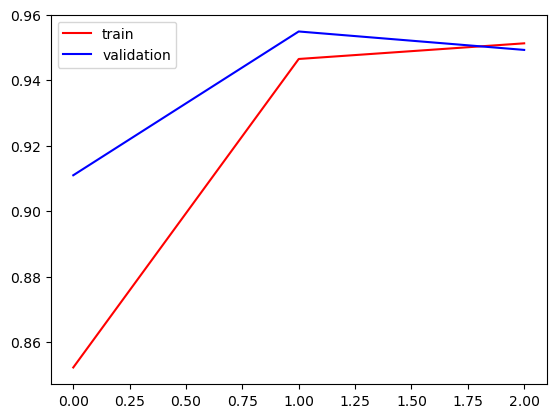

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

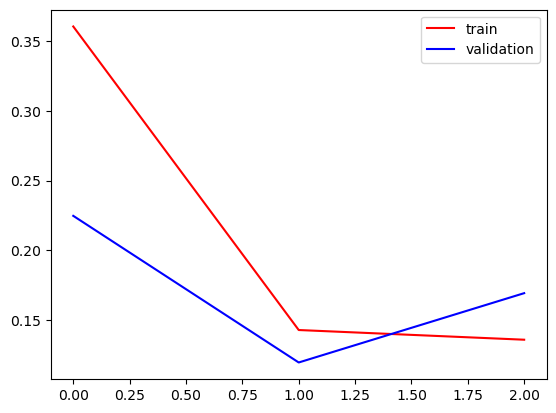

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 911 images belonging to 2 classes.


In [14]:
predictions = model.predict(test_data)
print(predictions)

29/29 [==============================] - 10s 330ms/step
[[2.30443954e-01]
 [1.52906915e-03]
 [8.46412599e-01]
 [9.99999106e-01]
 [9.99994040e-01]
 [9.99998093e-01]
 [2.45284457e-02]
 [9.98004615e-01]
 [4.05395366e-02]
 [9.99979079e-01]
 [8.64476919e-01]
 [9.99953687e-01]
 [9.99992967e-01]
 [9.99650657e-01]
 [1.00000000e+00]
 [3.08328141e-02]
 [9.99579430e-01]
 [4.29914286e-03]
 [4.58043143e-02]
 [5.14930487e-02]
 [8.26007526e-05]
 [9.99999821e-01]
 [1.00000000e+00]
 [8.64452243e-01]
 [9.64910761e-02]
 [8.96703541e-01]
 [1.73059013e-02]
 [1.28210634e-02]
 [9.99531507e-01]
 [9.35856998e-02]
 [6.91101998e-02]
 [9.52603072e-02]
 [1.37346308e-03]
 [5.18099987e-04]
 [4.14124188e-05]
 [1.77814871e-01]
 [9.99999344e-01]
 [9.70366836e-01]
 [9.99898195e-01]
 [1.74566090e-01]
 [9.99994159e-01]
 [2.67747402e-01]
 [4.23665456e-02]
 [9.97185111e-01]
 [9.98657107e-01]
 [5.49849942e-02]
 [9.99999344e-01]
 [2.05033459e-03]
 [9.97030199e-01]
 [9.99999940e-01]
 [1.01024257e-02]
 [9.99999821e-01]
 [3.8685

In [15]:
len(predictions)

911

In [16]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed


cm = confusion_matrix(true_labels, predicted_labels)


print("Confusion Matrix:")
print(cm)


print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[193 244]
 [210 264]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.44      0.46       437
           1       0.52      0.56      0.54       474

    accuracy                           0.50       911
   macro avg       0.50      0.50      0.50       911
weighted avg       0.50      0.50      0.50       911

